Connect to Google drive and import data.

*   The data here is principal components generated from placenta gene expression of genes associated with neurodevelopmental disorders and a cognitive outcome in the children.
*   The goal of the analysis is to predict the outcome from the PCs using a neural network.
*   The data have already gone through extensive normalisation and preprocessing procedures.


In [1]:
# Connects to your Google Drive so you can import files
from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/PC_ROST_cont.csv'
data = pd.read_csv(file_path)
data.sample(4)

Mounted at /content/drive


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,ROST_total_score
11,1.535367,-2.244429,-2.227169,-0.511992,1.789818,1.414190,0.150980,-4.403224,-1.529338,2.174658,...,-0.368569,0.177900,-0.015810,-0.513291,0.262742,-0.591842,0.591871,-0.750258,0.715430,8
28,1.529050,-0.589396,0.707050,1.281113,-2.526798,0.084325,-2.181984,2.615761,-0.025181,1.308688,...,-0.524677,-0.140571,-0.891855,-0.565676,0.754242,0.397532,-0.637885,-0.211076,-0.696787,5
81,-0.690376,-0.403814,1.997745,0.820817,-0.138261,-0.836994,1.152209,-1.227618,0.021805,1.178399,...,0.236089,-0.703674,-0.375897,0.415704,0.559152,-0.960654,1.420563,-1.242781,-0.228134,10
40,7.633773,-4.022447,5.182966,-1.325003,-2.270972,1.809855,2.946209,-3.044730,-0.443705,0.487111,...,0.425853,0.500545,-0.282548,0.494214,-0.330701,0.114787,-0.034716,0.084925,-0.332529,1


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split data into features and target
X = data.drop("ROST_total_score", axis=1)
y = data["ROST_total_score"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

# Create a Sequential model with some hidden layers and L1 reg
model = Sequential([
    Dense(82, input_dim=82, activation='relu', kernel_regularizer=l1(0.1)),
    Dense(41, activation='relu', kernel_regularizer=l1(0.1)),
    Dense(41, activation='relu', kernel_regularizer=l1(0.1)),
    Dense(20, activation='relu', kernel_regularizer=l1(0.1)),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model with an adaptive learning rate
optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer)



In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Setup early stopping
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,       # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=10,
    validation_split=0.2,
    callbacks=[early_stopping_monitor],
    verbose=1
)



Epoch 1/500
6/6 [==============================] - 2s 59ms/step - loss: 148.2278 - val_loss: 122.4462
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 104.7563 - val_loss: 99.2639
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 76.8481 - val_loss: 76.4304
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 56.7711 - val_loss: 62.6665
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 44.0902 - val_loss: 51.6754
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 34.9488 - val_loss: 43.7498
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 28.0628 - val_loss: 37.8717
Epoch 8/500
6/6 [==============================] - 0s 12ms/step - loss: 22.9464 - val_loss: 34.4471
Epoch 9/500
6/6 [==============================] - 0s 11ms/step - loss: 19.3279 - val_loss: 32.4949
Epoch 10/500
6/6 [==============================] - 0s 13ms/step - loss: 16.8843 - val_loss: 30.2

In [5]:
test_loss = model.evaluate(X_test, y_test)
print('Test MSE:', test_loss)


1/1 [==============================] - 0s 38ms/step - loss: 14.8328
Test MSE: 14.832778930664062


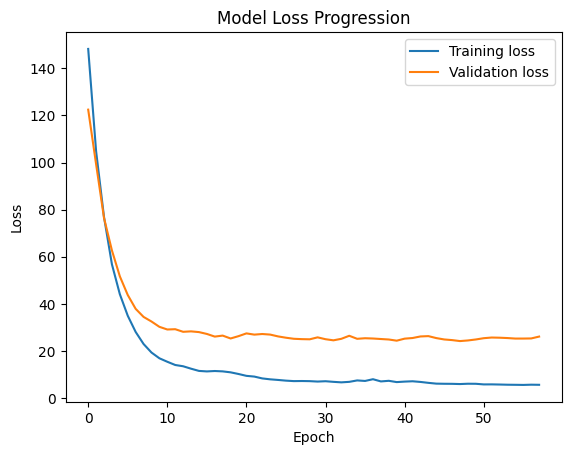

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
